<a href="https://colab.research.google.com/github/Ram2005-ui/us_accidents_data_analysis/blob/main/Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment-2

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("/content/drive/MyDrive/data/US_Accidents_March23.csv")
print("Dataset shape:", df.shape)

Dataset shape: (7728394, 46)


1.What is the distribution of accident severity levels?

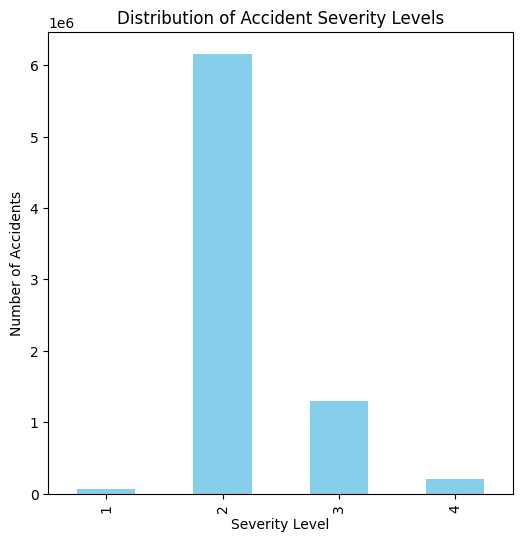

Severity
1      67366
2    6156981
3    1299337
4     204710
Name: count, dtype: int64


In [ ]:
plt.figure(figsize=(6,6))
severity_counts = df['Severity'].value_counts().sort_index()
severity_counts.plot(kind='bar', color='skyblue')
plt.title("Distribution of Accident Severity Levels")
plt.xlabel("Severity Level")
plt.ylabel("Number of Accidents")
plt.show()

print(severity_counts)


2.How is the accident frequency distributed by hour of the day?

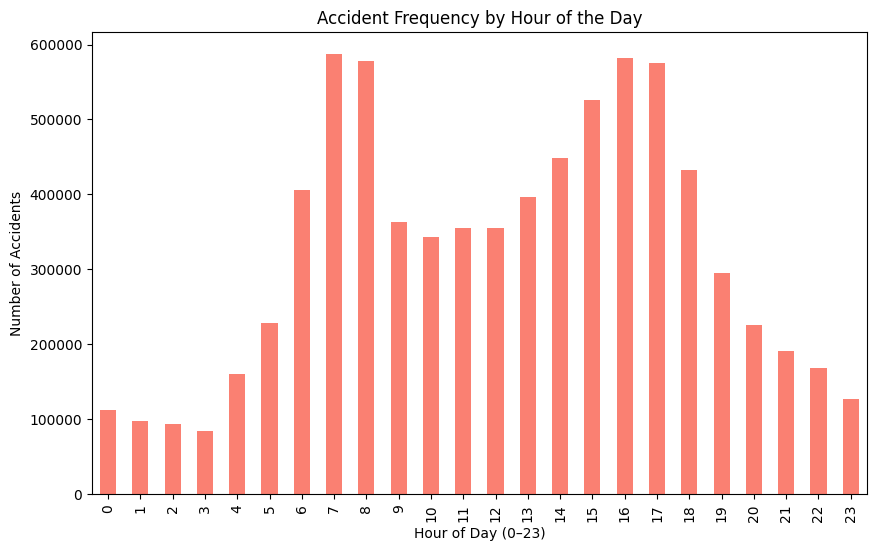

In [ ]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'].str.split('.').str[0], errors='coerce')
df['Hour'] = df['Start_Time'].dt.hour
plt.figure(figsize=(10,6))
df['Hour'].value_counts().sort_index().plot(kind='bar', color='salmon')
plt.title("Accident Frequency by Hour of the Day")
plt.xlabel("Hour of Day (0–23)")
plt.ylabel("Number of Accidents")
plt.show()


3.Which days of the week have the highest number of accidents?

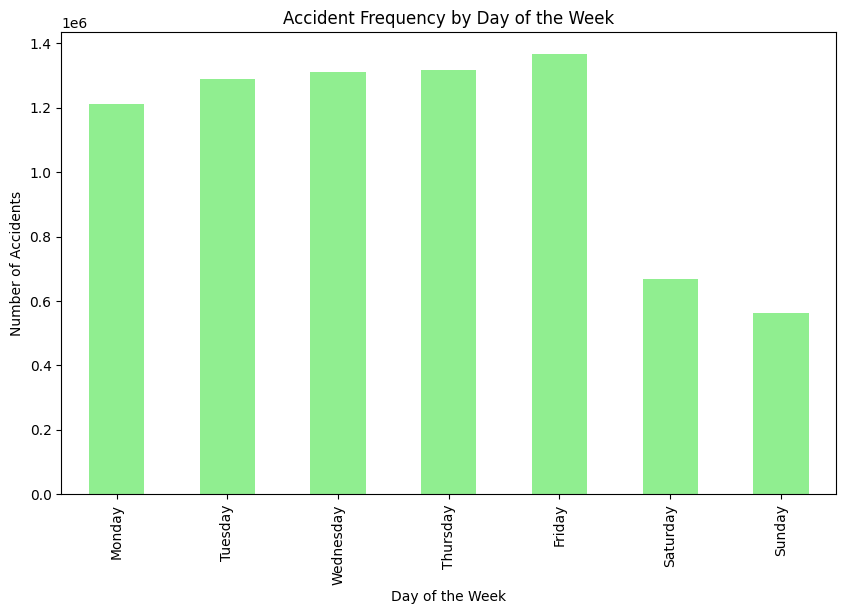

In [ ]:
df['DayOfWeek'] = df['Start_Time'].dt.day_name()
plt.figure(figsize=(10,6))
df['DayOfWeek'].value_counts().reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']).plot(kind='bar', color='lightgreen')
plt.title("Accident Frequency by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Accidents")
plt.show()

4.What are the most common weather conditions during accidents?

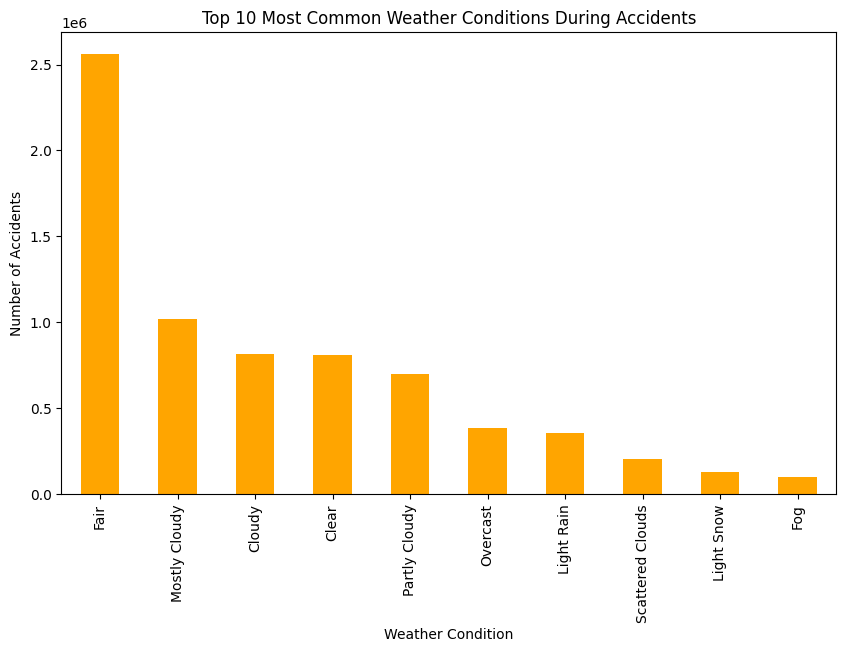

In [ ]:
top_weather = df['Weather_Condition'].value_counts().head(10)
plt.figure(figsize=(10,6))
top_weather.plot(kind='bar', color='orange')
plt.title("Top 10 Most Common Weather Conditions During Accidents")
plt.xlabel("Weather Condition")
plt.ylabel("Number of Accidents")
plt.show()

5.How to identify columns with missing data and their missing percentage?

In [ ]:
missing_percent = df.isnull().mean() * 100
missing_percent = missing_percent[missing_percent > 0].sort_values(ascending=False)
print(missing_percent)

End_Lat                  44.029355
End_Lng                  44.029355
Precipitation(in)        28.512858
Wind_Chill(F)            25.865904
Wind_Speed(mph)           7.391355
Visibility(mi)            2.291524
Wind_Direction            2.267043
Humidity(%)               2.253301
Weather_Condition         2.244438
Temperature(F)            2.120143
Pressure(in)              1.820288
Weather_Timestamp         1.555666
Sunrise_Sunset            0.300787
Civil_Twilight            0.300787
Nautical_Twilight         0.300787
Astronomical_Twilight     0.300787
Airport_Code              0.292881
Street                    0.140637
Timezone                  0.101030
Zipcode                   0.024779
City                      0.003274
Description               0.000065
dtype: float64


6.How to impute missing numerical values with median?

In [ ]:
num_cols = df.select_dtypes(include=['float64','int64']).columns
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())


7.How to impute missing categorical values with the mode?

In [ ]:
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])


8.How to label encode a categorical column?

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Weather_Condition_Label'] = le.fit_transform(df['Weather_Condition'])
print(df[['Weather_Condition','Weather_Condition_Label']].head())


  Weather_Condition  Weather_Condition_Label
0        Light Rain                       62
1        Light Rain                       62
2          Overcast                       88
3     Mostly Cloudy                       85
4     Mostly Cloudy                       85


9.How to one-hot encode a categorical column?

In [ ]:
df_onehot = pd.get_dummies(df, columns=['State'], drop_first=True)
print(df_onehot.shape)


(7728394, 96)
